In [2]:
import os 

import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import scipy.linalg as sla

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../plots/'

from pypower import BaseMatrix
from emulator_fit import get_power_likelihood
from wmatrix_utils import plot_matrix
from marginalized_likelihood import get_likelihood_elements, get_t, aprime, get_new_elements

tracer = 'ELG'
region = 'SGC'
completeness = 'complete_'
stat = 'power'
theory_name = 'velocileptors'
rp_cut = 2.5
xinmax = True
solve = True
fc = ''
imock = None
direct = False

ells = [0, 2, 4]

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/'
#data_dir = '/Users/mp270220/Work/fiber_collisions/'

In [4]:
kobsmax = 0.25

likelihood_elements = get_likelihood_elements(tracer, region, completeness, stat, theory_name, rp_cut, kobsmax=kobsmax, save=True)
w = likelihood_elements['wmatrix']
cov = likelihood_elements['covariance']
theory = likelihood_elements['theory_vector']
data = likelihood_elements['data']
shotnoise = likelihood_elements['shotnoise']

footprint


/global/cfs/cdirs/desi/users/adematti/perlmutter/cosmodesiconda/20221205-1.0.0/conda/lib/python3.10/site-packages/numpy/lib/polynomial.py:1338: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [5]:
w.xin[0][-20]

0.2839814125959195

In [6]:
if rp_cut:
    wmatrix_rpcut = None
else:
    wmatrix_rpcut = get_likelihood_elements(tracer, region, completeness, stat, theory_name, 2.5, kobsmax=kobsmax, save=True)['wmatrix']

new_likelihood_elements = get_new_elements(data, w, cov, wmatrix_rpcut=wmatrix_rpcut, shotnoise=shotnoise, ells=[0, 2, 4], idces=[-1])
wmatrixnew = new_likelihood_elements['wmatrix']

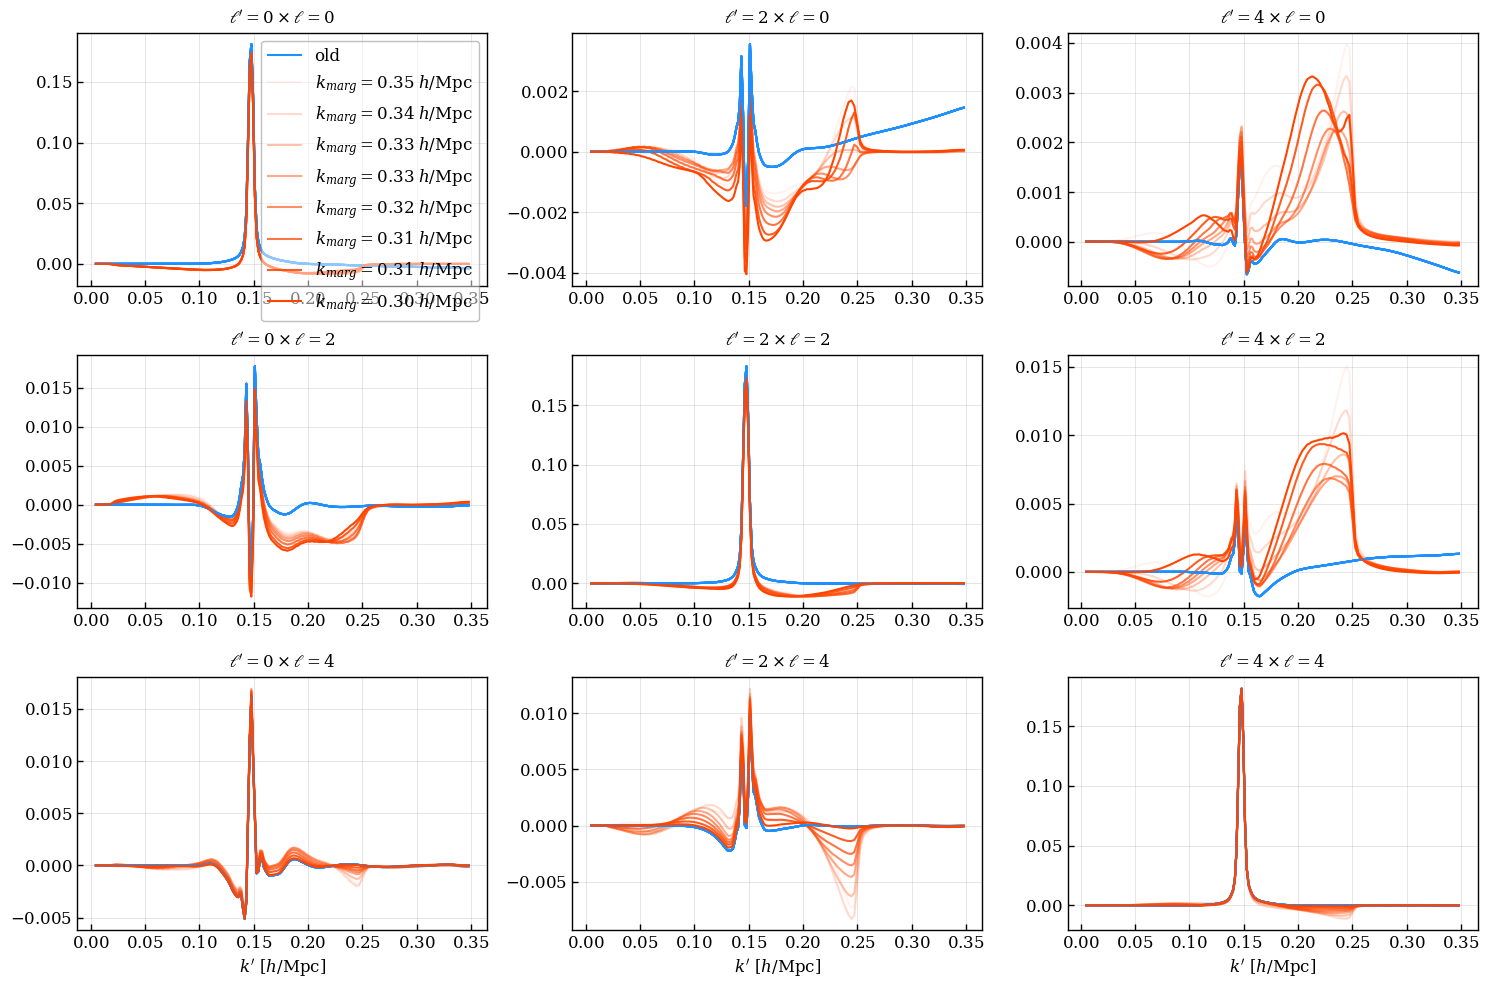

In [9]:
kval = 0.15
indexout = np.abs(w.xout[0] - kval).argmin()

fig, lax = plt.subplots(len(w.projsout), len(w.projsin), figsize=(15, 10))

for imarg in [-1, -3, -5, -7, -9, -11, -13, -15]:

    new_likelihood_elements = get_new_elements(data, w, cov, wmatrix_rpcut=wmatrix_rpcut, shotnoise=shotnoise, ells=[0, 2, 4], idces=[imarg])
    wmatrixnew = new_likelihood_elements['wmatrix']

    for iin, projin in enumerate(w.projsin):
        for iout, projout in enumerate(w.projsout):
            if np.asarray(lax).ndim > 0:
                ax = lax[iout][iin]
            else:
                ax = lax
            # Indices in approximative window matrix
            norm = 1.
            ax.plot(w.xin[iin], w.unpacked()[iin][iout][:, indexout] / norm, label='old' if imarg==-1 else '', color='dodgerblue')
            ax.plot(w.xin[iin], wmatrixnew.unpacked()[iin][iout][:, indexout] / norm, color='orangered', label=r'$k_{{marg}} = {:.2f} \; h/\mathrm{{Mpc}}$'.format(w.xin[0][imarg]), alpha=np.abs(imarg)/15)
            ax.set_title(r'$\ell^\prime = {:d} \times \ell = {:d}$'.format(projin.ell, projout.ell))
            ax.grid(True)
            if iout == len(w.projsout) - 1: ax.set_xlabel(r'$k^{\prime}$ [$h/\mathrm{Mpc}$]')
            if iin == iout == 0: ax.legend()
plt.savefig(os.path.join(plots_dir, 'wmatrix_rpcut_marginalized_fixedk_koutmax0.25_varyingkmarg.png'), dpi=300)
plt.show()

footprint
footprint
footprint
footprint


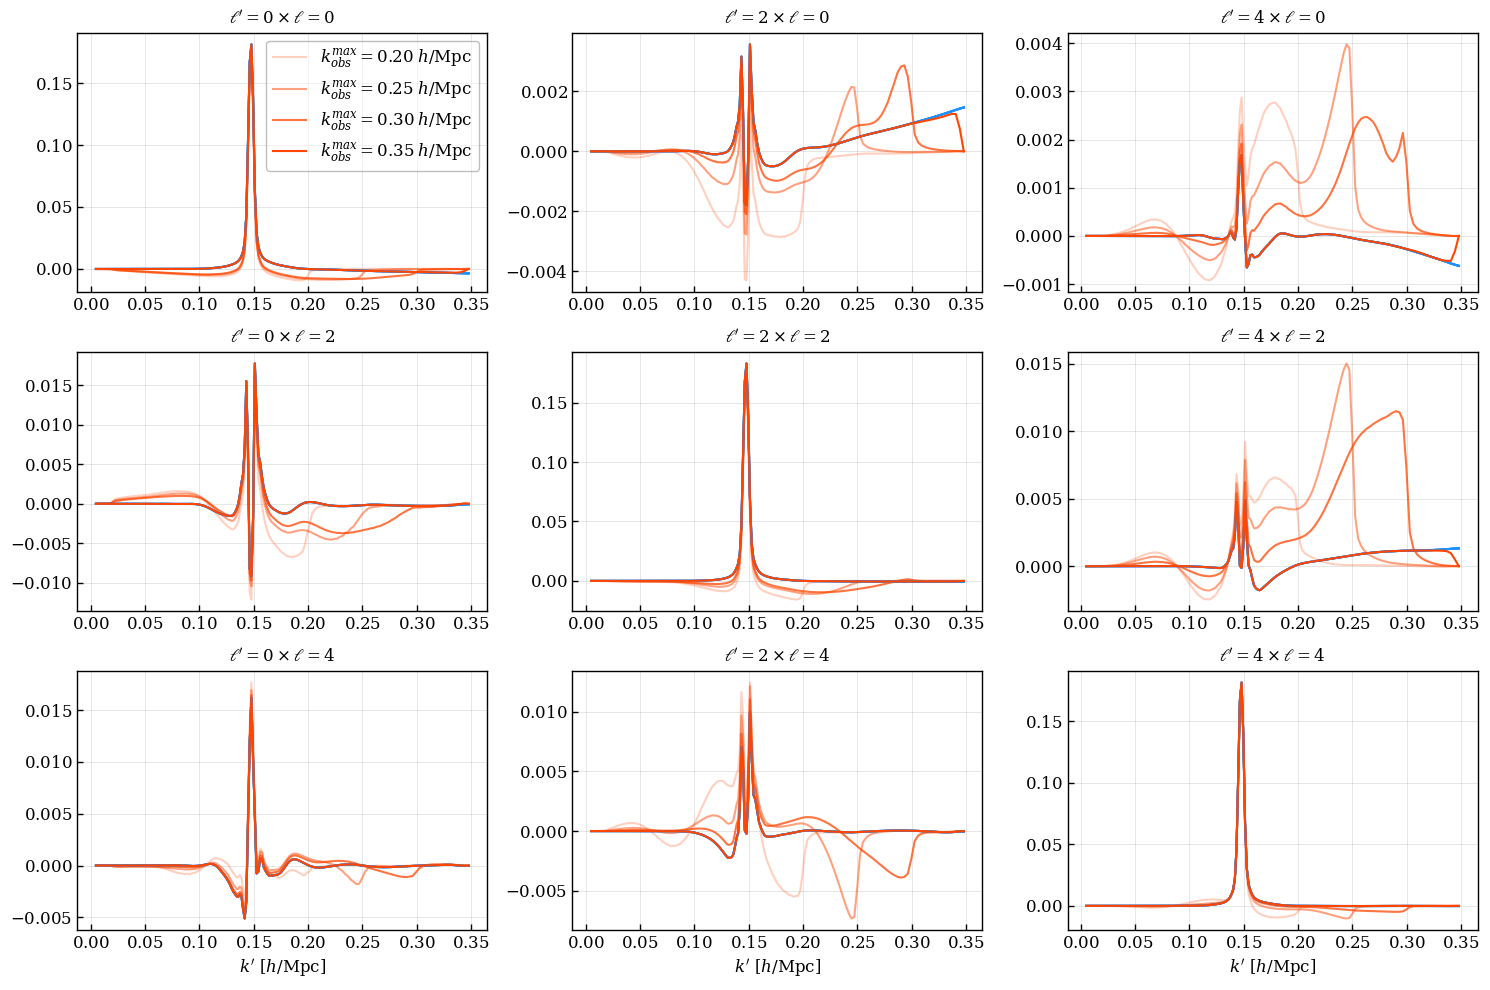

In [12]:
kval = 0.15
indexout = np.abs(w.xout[0] - kval).argmin()

fig, lax = plt.subplots(len(w.projsout), len(w.projsin), figsize=(15, 10))

for kidx, kobsmax in enumerate([0.2, 0.25, 0.3, 0.35]):
    
    likelihood_elements = get_likelihood_elements(tracer, region, completeness, stat, theory_name, rp_cut, kobsmax=kobsmax, save=True)
    w = likelihood_elements['wmatrix']
    cov = likelihood_elements['covariance']
    theory = likelihood_elements['theory_vector']
    data = likelihood_elements['data']
    shotnoise = likelihood_elements['shotnoise']
    
    if rp_cut:
        wmatrix_rpcut = None
    else:
        wmatrix_rpcut = get_likelihood_elements(tracer, region, completeness, stat, theory_name, 2.5, kobsmax=kobsmax, save=True)['wmatrix']

    new_likelihood_elements = get_new_elements(data, w, cov, wmatrix_rpcut=wmatrix_rpcut, shotnoise=shotnoise, ells=[0, 2, 4], idces=[-1])
    wmatrixnew = new_likelihood_elements['wmatrix']

    for iin, projin in enumerate(w.projsin):
        for iout, projout in enumerate(w.projsout):
            if np.asarray(lax).ndim > 0:
                ax = lax[iout][iin]
            else:
                ax = lax
            # Indices in approximative window matrix
            norm = 1.
            ax.plot(w.xin[iin], w.unpacked()[iin][iout][:, indexout] / norm, label='old' if imarg==-1 else '', color='dodgerblue')
            ax.plot(w.xin[iin], wmatrixnew.unpacked()[iin][iout][:, indexout] / norm, color='orangered', label=r'$k_{{obs}}^{{max}} = {:.2f} \; h/\mathrm{{Mpc}}$'.format(kobsmax), alpha=(1+kidx)/4)
            ax.set_title(r'$\ell^\prime = {:d} \times \ell = {:d}$'.format(projin.ell, projout.ell))
            ax.grid(True)
            if iout == len(w.projsout) - 1: ax.set_xlabel(r'$k^{\prime}$ [$h/\mathrm{Mpc}$]')
            if iin == iout == 0: ax.legend()
plt.savefig(os.path.join(plots_dir, 'wmatrix_rpcut_marginalized_fixedk_varyingkobs.png'), dpi=300)
plt.show()

In [7]:
invcov = np.linalg.inv(cov)
idces = [-1]

anew = aprime(invcov, w, idces, ells, prior=1e-8)

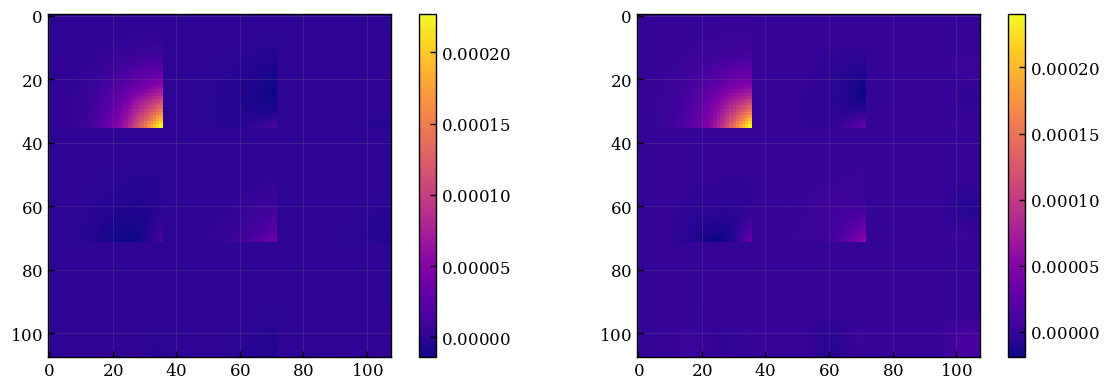

In [8]:
fig, lax = plt.subplots(1, 2, figsize=(12, 4))

cmap = lax[0].imshow(invcov - aprime(invcov, w, idces, ells, prior=1e-8))
fig.colorbar(cmap)
cmap = lax[1].imshow(invcov - aprime(invcov, w, idces, ells, prior=False))
fig.colorbar(cmap)

plt.show()

In [11]:
anew = aprime(invcov, w, idces, ells, prior=1e-8)

lda, m = sla.eigh(anew)
lda, m

(array([7.22106745e-08, 1.30783252e-07, 2.00103721e-07, 2.31291415e-07,
        3.57856689e-07, 3.92293029e-07, 5.16761986e-07, 6.27992441e-07,
        6.31623556e-07, 9.43030830e-07, 1.04997889e-06, 1.33193280e-06,
        1.65018375e-06, 1.68886337e-06, 1.79504304e-06, 2.35015233e-06,
        2.45045464e-06, 2.96811821e-06, 3.04288540e-06, 3.42061931e-06,
        3.94243760e-06, 4.55609145e-06, 5.09259509e-06, 5.14313753e-06,
        5.90550422e-06, 6.73916563e-06, 7.55764246e-06, 8.36850506e-06,
        8.81856404e-06, 9.68348515e-06, 1.14142683e-05, 1.24553441e-05,
        1.29906902e-05, 1.44905605e-05, 1.61165622e-05, 1.79449509e-05,
        1.89235575e-05, 2.07946418e-05, 2.16595828e-05, 2.55484317e-05,
        2.59983291e-05, 2.65823530e-05, 2.96643991e-05, 3.29716049e-05,
        3.41148320e-05, 3.44246263e-05, 3.88888227e-05, 4.01556383e-05,
        4.36743651e-05, 4.47607318e-05, 4.69414557e-05, 5.08887663e-05,
        5.30220630e-05, 5.64308517e-05, 5.87504516e-05, 6.082887

In [8]:
lda[lda < sorted(lda)[3]] = 0

In [9]:
m.T.dot(invcov).dot(m)

array([[ 7.41818589e-08, -4.02665916e-09, -2.46186658e-08, ...,
         1.49503427e-07, -1.36763891e-07, -1.18809479e-07],
       [-4.02665916e-09,  1.39008760e-07,  5.02900421e-08, ...,
        -3.05555852e-07,  2.79530226e-07,  2.42843200e-07],
       [-2.46186658e-08,  5.02900421e-08,  5.07573074e-07, ...,
        -1.86670700e-06,  1.70760477e-06,  1.48339990e-06],
       ...,
       [ 1.49503427e-07, -3.05555852e-07, -1.86670700e-06, ...,
         1.89332696e-03, -1.57717345e-05, -1.40443802e-05],
       [-1.36763891e-07,  2.79530226e-07,  1.70760477e-06, ...,
        -1.57717345e-05,  2.05042403e-03,  1.32185409e-05],
       [-1.18809479e-07,  2.42843200e-07,  1.48339990e-06, ...,
        -1.40443802e-05,  1.32185409e-05,  2.22227835e-03]])

In [10]:
def get_missing_values(idx=np.where(lda==0)[0]):
    #res = np.sum((m.T.dot(m1))[idx, :]**2 * lda1, axis=1)
    res = m.T.dot(invcov).dot(m)[idx, idx]
    return res

In [11]:
res = get_missing_values() #minimize(to_minimize, np.full(3, 1))

In [12]:
res

array([7.41818589e-08, 1.39008760e-07, 5.07573074e-07])

In [13]:
lda_new = lda.copy()
lda_new[lda==0] = res
astar = m.dot(np.diag(lda_new)).dot(m.T)

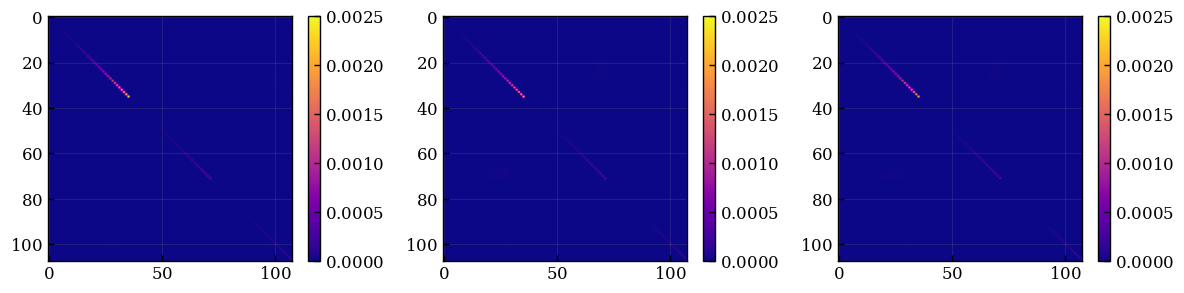

In [14]:
fig, lax = plt.subplots(1, 3, figsize=(12, 3))

norm = Normalize(vmin=0, vmax=2.5e-3)

cmap = lax[0].imshow(invcov, norm=norm)
fig.colorbar(cmap)
cmap = lax[1].imshow(anew, norm=norm)
fig.colorbar(cmap)
cmap = lax[2].imshow(astar, norm=norm)
fig.colorbar(cmap)

plt.show()

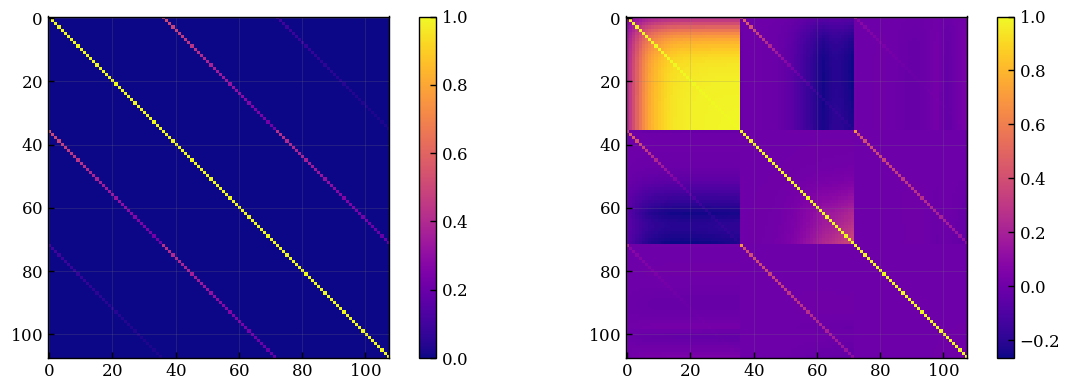

In [15]:
fig, lax = plt.subplots(1, 2, figsize=(12, 4))

from pycorr import utils
corrcoeff  = utils.cov_to_corrcoef(cov)
corrcoeff_new  = utils.cov_to_corrcoef(np.linalg.inv(astar))

cmap = lax[0].imshow(corrcoeff)
fig.colorbar(cmap)

cmap = lax[1].imshow(corrcoeff_new)
fig.colorbar(cmap)

plt.show()

In [16]:
std = np.array_split(np.sqrt(np.diag(cov)), len(ells))
std_new = np.array_split(np.sqrt(np.diag(np.linalg.inv(astar))), len(ells))

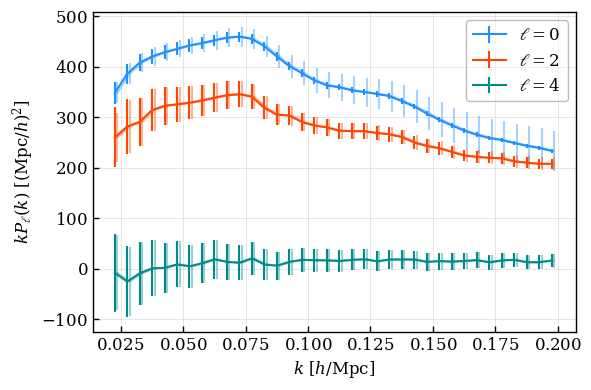

In [17]:
colors = ['dodgerblue', 'orangered', 'darkcyan']

for ill, ell in enumerate(ells):
    plt.errorbar(w.xout[ill], w.xout[ill] * data[ill], w.xout[ill] *  std[ill], color=colors[ill], label=r'$\ell = {}$'.format(ell))
    plt.errorbar(w.xout[ill]+0.001, w.xout[ill] * data[ill], w.xout[ill] * std_new[ill], color=colors[ill], alpha=0.4)
plt.ylabel(r'$k P_{\ell}(k)$ [$(\mathrm{Mpc}/h)^{2}$]')
plt.xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.legend()
plt.show()

In [18]:
mk = m.copy()
np.where(lda==0)

(array([0, 1, 2]),)

In [19]:
mk[:, lda==0] = 0

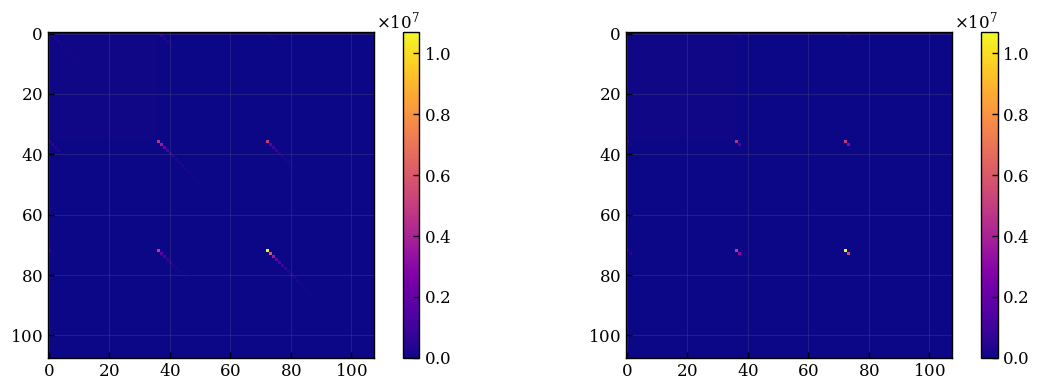

In [20]:
fig, lax = plt.subplots(1, 2, figsize=(12, 4))

norm = Normalize(vmin=-0.00025, vmax=0.0015)

cmap = lax[0].imshow(np.linalg.inv(astar))
fig.colorbar(cmap)
cmap = lax[1].imshow(np.linalg.inv(astar) - (m.dot(mk.T).dot(cov).dot(m.dot(mk.T).T)))
fig.colorbar(cmap)

plt.show()

In [21]:
wnew = m.dot(mk.T).dot(w.value.T)

In [22]:
wnew.shape

(108, 1194)

In [23]:
wmatrixnew = w.deepcopy()
wmatrixnew.value = wnew.T

/tmp/ipykernel_1051059/2885708681.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(os.path.join(plots_dir, 'wmatrix_rpcut_marginalized.png'), dpi=300)
/global/cfs/cdirs/desi/users/adematti/perlmutter/cosmodesiconda/20221205-1.0.0/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


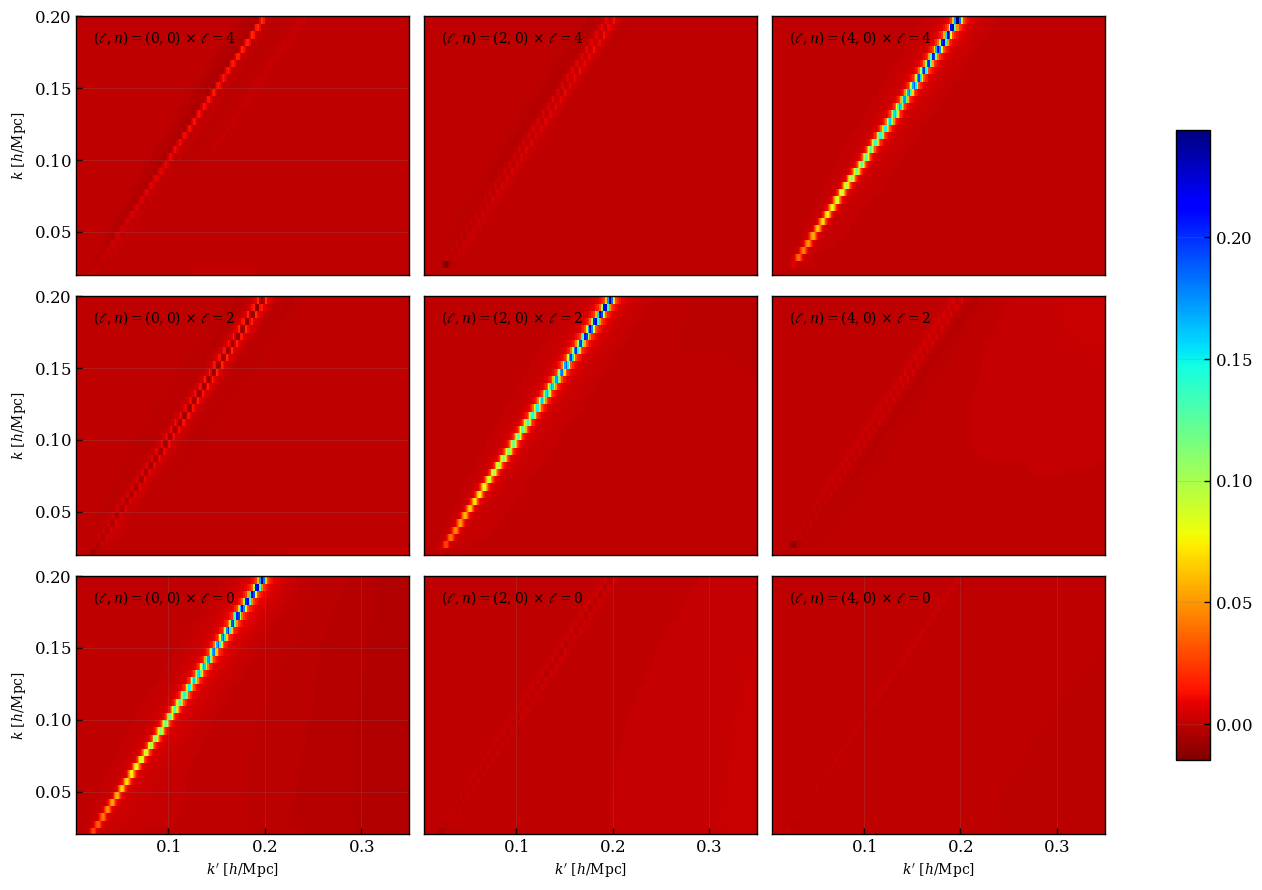

In [24]:
norm = Normalize(vmin=0, vmax=1)

plot_matrix(wmatrixnew.unpacked(), x1=wmatrixnew.xin, x2=wmatrixnew.xout, xlabel1=r'$k^\prime$ [$h/\mathrm{Mpc}$]', xlabel2=r'$k$ [$h/\mathrm{Mpc}$]',
            barlabel=None, label1=[proj.latex(inline=True) for proj in wmatrixnew.projsin], label2=[proj.latex(inline=True) for proj in wmatrixnew.projsout])
plt.savefig(os.path.join(plots_dir, 'wmatrix_rpcut_marginalized.png'), dpi=300)
plt.show()

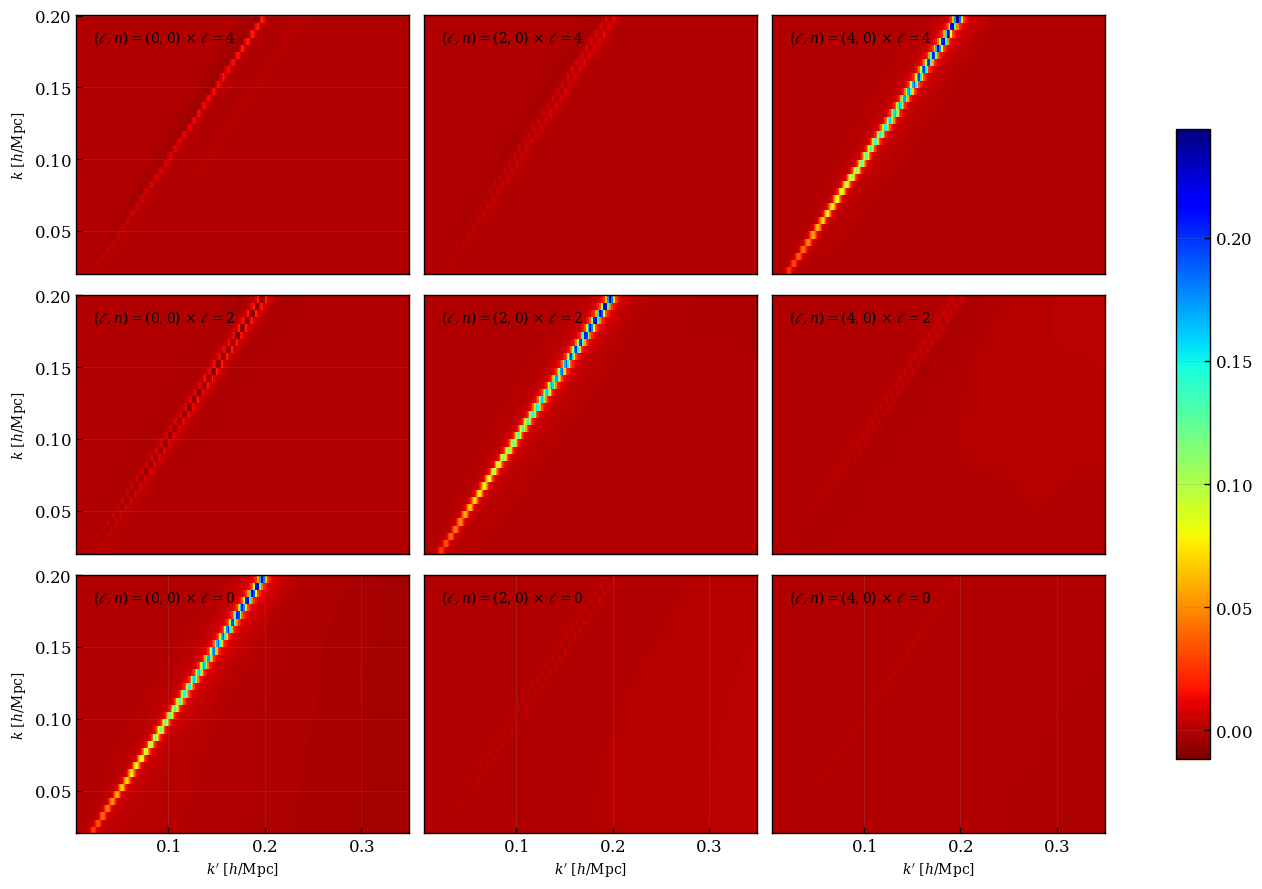

In [25]:
from matplotlib.colors import Normalize

plot_matrix(w.unpacked(), x1=w.xin, x2=w.xout, xlabel1=r'$k^\prime$ [$h/\mathrm{Mpc}$]', xlabel2=r'$k$ [$h/\mathrm{Mpc}$]',
            barlabel=None, label1=[proj.latex(inline=True) for proj in w.projsin], label2=[proj.latex(inline=True) for proj in w.projsout])
plt.show()

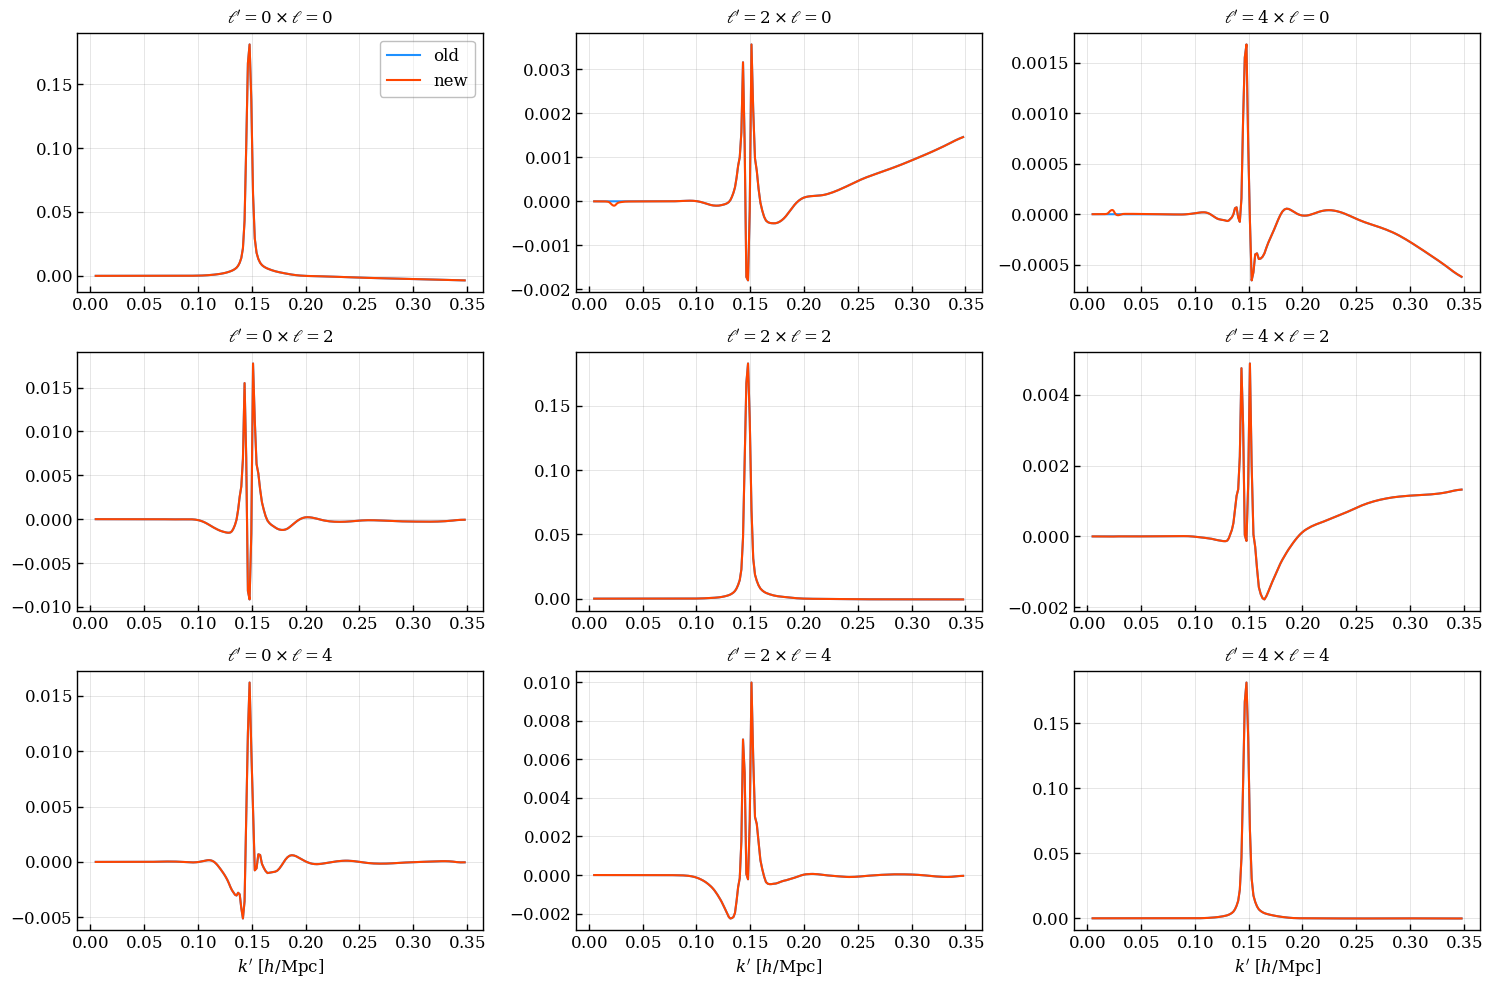

In [26]:
kval = 0.15
indexout = np.abs(w.xout[0] - kval).argmin()

fig, lax = plt.subplots(len(w.projsout), len(w.projsin), figsize=(15, 10))
for iin, projin in enumerate(w.projsin):
    for iout, projout in enumerate(w.projsout):
        if np.asarray(lax).ndim > 0:
            ax = lax[iout][iin]
        else:
            ax = lax
        # Indices in approximative window matrix
        norm = 1.
        ax.plot(w.xin[iin], w.unpacked()[iin][iout][:, indexout] / norm, label='old', color='dodgerblue')
        ax.plot(w.xin[iin], wmatrixnew.unpacked()[iin][iout][:, indexout] / norm, color='orangered', label='new')
        ax.set_title(r'$\ell^\prime = {:d} \times \ell = {:d}$'.format(projin.ell, projout.ell))
        ax.grid(True)
        if iout == len(w.projsout) - 1: ax.set_xlabel(r'$k^{\prime}$ [$h/\mathrm{Mpc}$]')
        if iin == iout == 0: ax.legend()
#plt.savefig(os.path.join(plots_dir, 'wmatrix_rpcut_marginalized_fixedk_koutmax0.25.png'), dpi=300)
plt.show()

In [26]:
def chisquare(data, theory, w, invcov, shotnoise=None, ells=(0, 2, 4)):
    d = data.copy()
    th = theory.copy()
    if shotnoise is not None:
        nells = len(ells)
        d[:len(d) // nells] += shotnoise
        th[:len(th) // nells] += shotnoise
    wm = w.value.T
    tmp = d - wm.dot(th)
    #print(tmp)
    res = tmp.T @ invcov @ tmp
    return res


def new_chisquare(data, theory, w, invcov, ells, theta, idces, shotnoise=None):
    d = data.copy()
    th = theory.copy()
    if shotnoise is not None:
        nells = len(ells)
        d[:len(d) // nells] += shotnoise
        th[:len(th) // nells] += shotnoise
 
    anew = aprime(invcov, w, idces, ells)
    lda, m = sla.eigh(anew)
    mk = m.copy()
    lda[lda < 1e-15] = 0
    mk[:, lda==0] = 0
    #lda[lda < 1e-15] = 1
    #m = mk
    wnew = w.deepcopy()
    wnew.value = (m.dot(mk.T).dot(w.value.T)).T
    
    m0 = m - mk
    #t0 = m @ m0.T @ d
    #dnew = d - t0
    dnew = m.dot(mk.T).dot(d)
    t0 = d - dnew
    t = get_t(w, idces, ells)
    tnew = th - np.sum(theta * t, axis=1)
    
    astar = m.dot(np.diag(lda_new)).dot(m.T)
    #print(m.dot(mk.T).dot(invcov))
    #print(np.max(np.abs((anew - m.dot(mk.T).dot(invcov).dot((m.dot(mk.T))).T) / anew)))
    res = chisquare(d - t0, tnew, wnew, astar, shotnoise=None, ells=ells)

    return res

In [27]:
offset = 100
chisq = chisquare(data.flatten() + offset, theory.flatten(), w, invcov, shotnoise)
chisq

349.26287416325033

In [28]:
new_chisq = new_chisquare(data.flatten()  + offset, theory.flatten(), w, invcov, ells = [0, 2, 4], theta = np.array([0, 0, 0]), idces = [-1], shotnoise=shotnoise) 
new_chisq

346.4843760178968

In [29]:
theta_vals = np.linspace(-1000, 1000, 100)

chisquares_vals = [new_chisq for tha in theta_vals]
new_chisquares_vals1 = [new_chisquare(data.flatten() + offset, theory.flatten(), w, invcov, ells = [0, 2, 4], theta = np.array([tha, 0, 0]), idces = [-1], shotnoise=shotnoise) for tha in theta_vals]
new_chisquares_vals2 = [new_chisquare(data.flatten() + offset, theory.flatten(), w, invcov, ells = [0, 2, 4], theta = np.array([0, tha, 0]), idces = [-1], shotnoise=shotnoise) for tha in theta_vals]
new_chisquares_vals3 = [new_chisquare(data.flatten() + offset, theory.flatten(), w, invcov, ells = [0, 2, 4], theta = np.array([0, 0, tha]), idces = [-1], shotnoise=shotnoise) for tha in theta_vals]

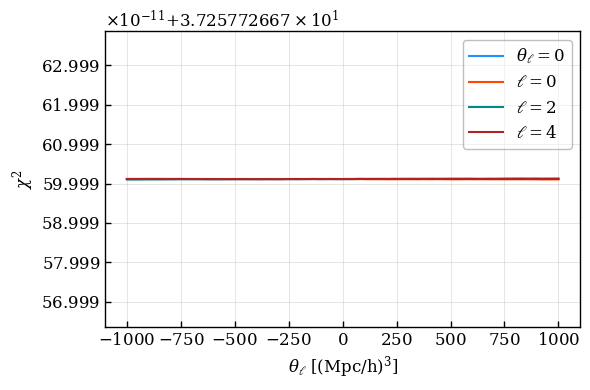

In [147]:
plt.plot(theta_vals, chisquares_vals, label=r'$\theta_{\ell} = 0$')
plt.plot(theta_vals, new_chisquares_vals1, label=r'$\ell = 0$')
plt.plot(theta_vals, new_chisquares_vals2, label=r'$\ell = 2$')
plt.plot(theta_vals, new_chisquares_vals3, label=r'$\ell = 4$')
plt.xlabel(r'$\theta_{\ell}$ [$(\mathrm{Mpc/h})^3$]')
plt.ylabel(r'$\chi^2$')
plt.legend()
plt.show()